In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector

db=mysql.connector.connect(
    host='localhost',
    user='root',
    password='kiit',
    database='ecommerce_project'
)
cur = db.cursor()

# List all unique cities where customers are located.

In [57]:
query= """ select distinct customer_city from customers """
cur.execute(query)
data=cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [60]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp)=2017 """
cur.execute(query)
data=cur.fetchall()
data

[(45101,)]

In [62]:
#or
"total orders placed in 2017 are",data[0][0]

('total orders placed in 2017 are', 45101)

# Find the total sales per category.

In [65]:
query = """ select products.product_category,
round(sum(payments.payment_value),2)
from products join Order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by product_category
"""
cur.execute(query)
data=cur.fetchall()
data

[('perfumery', 506738.66),
 ('Furniture Decoration', 1430176.39),
 ('telephony', 486882.05),
 ('bed table bath', 1712553.67),
 ('automotive', 852294.33),
 ('computer accessories', 1585330.45),
 ('housewares', 1094758.13),
 ('babies', 539845.66),
 ('toys', 619037.69),
 ('Furniture office', 646826.49),
 ('Cool Stuff', 779698.0),
 ('HEALTH BEAUTY', 1657373.12),
 ('pet Shop', 311268.97),
 ('General Interest Books', 64694.76),
 ('stationary store', 317440.07),
 ('Watches present', 1429216.68),
 ('PCs', 279121.55),
 ('climatization', 91170.66),
 ('Construction Tools Construction', 241475.63),
 ('sport leisure', 1392127.56),
 ('Bags Accessories', 187151.29),
 ('electronics', 259857.1),
 ('Casa Construcao', 136645.29),
 ('Games consoles', 195480.38),
 ('Fashion Bags and Accessories', 218158.28),
 ('home appliances', 95532.27),
 ('Garden tools', 838280.75),
 ('Agro Industria e Comercio', 118730.61),
 (None, 252801.71),
 ('audio', 60324.62),
 ('technical books', 24915.44),
 ('Construction Tools 

In [66]:
#or
df=pd.DataFrame(data)
df

,0,1
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


In [69]:
#or
df=pd.DataFrame(data,columns=["Category","Sales"])
df

,Category,Sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


# Calculate the percentage of orders that were paid in installments.

In [81]:
query = """ select (sum(case when payment_installments >=1 then 1 else 0 end)/count(*))*100 
from payments"""
cur.execute(query)
data=cur.fetchall()
data

[(Decimal('99.9981'),)]

# Count the number of customers from each state. 

   City Name  No of Customers
0         RR               46
1         AP               68
2         AC               81
3         AM              148
4         RO              253
5         TO              280
6         SE              350
7         AL              413
8         RN              485
9         PI              495
10        PB              536
11        MS              715
12        MA              747
13        MT              907
14        PA              975
15        CE             1336
16        PE             1652
17        GO             2020
18        ES             2033
19        DF             2140
20        BA             3380
21        SC             3637
22        PR             5045
23        RS             5466
24        MG            11635
25        RJ            12852
26        SP            41746


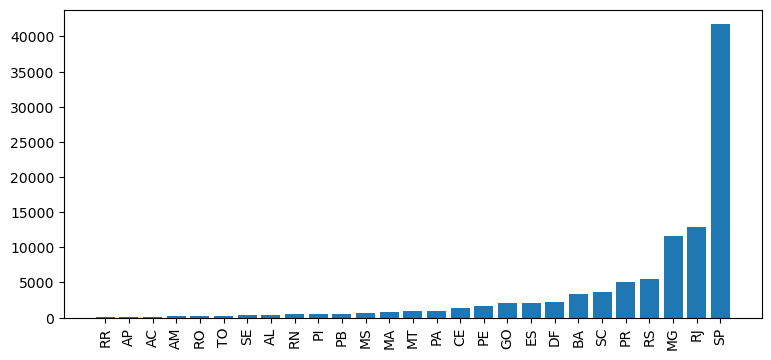

In [142]:
query = """ select customer_state,count(customer_state) as c from customers
group by customer_state
order by c 
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["City Name","No of Customers"])
print(df)

plt.figure(figsize=(9,4))
plt.bar(df["City Name"],df["No of Customers"])
plt.xticks(rotation=90)

plt.show()

# "NO of customers from each city are: ",data

# Calculate the number of orders per month in 2018.

In [161]:
query = """ select monthname(order_purchase_timestamp) months,count(order_id) order_count from orders
where year(order_purchase_timestamp)=2018
group by months
"""
cur.execute(query)
data=cur.fetchall()
data

[('July', 6292),
 ('August', 6512),
 ('February', 6728),
 ('June', 6167),
 ('March', 7211),
 ('January', 7269),
 ('May', 6873),
 ('April', 6939),
 ('September', 16),
 ('October', 4)]

In [184]:
df=pd.DataFrame(data,columns=["months","order_count"])
df

,months,order_count
0,July,6292
1,August,6512
2,February,6728
3,June,6167
4,March,7211
5,January,7269
6,May,6873
7,April,6939
8,September,16
9,October,4


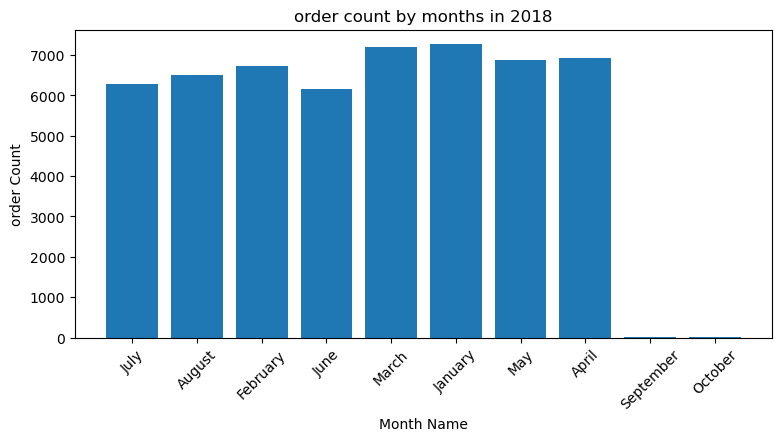

In [222]:
plt.figure(figsize=(9,4))
plt.bar(df["months"],df["order_count"])
plt.xlabel("Month Name")
plt.ylabel("order Count")
plt.title("order count by months in 2018")
plt.xticks(rotation=45)
plt.show()

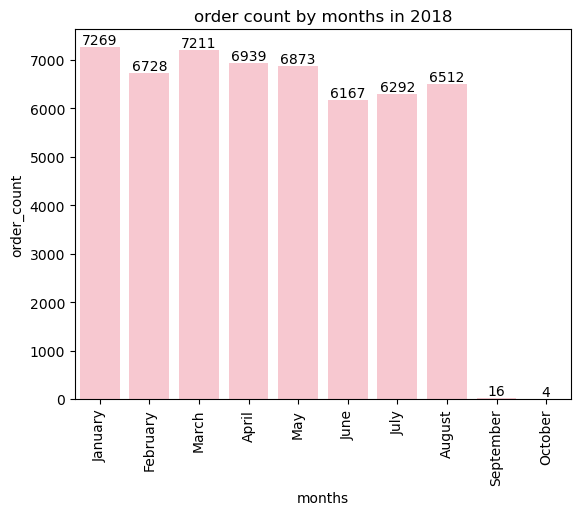

In [237]:
o=["January","February","March","April","May","June","July","August","September","October"]

a=sns.barplot(x=df["months"],y=df["order_count"],data=df,order=o,color="pink")
plt.xticks(rotation=90)
a.bar_label(ax.containers[0])
plt.title("order count by months in 2018")
plt.show()

# Find the average number of products per order, grouped by customer city


In [245]:
query='''with count_per_order as (
select orders.order_id,orders.customer_id,count(order_items.order_id) count
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id,orders.customer_id)

select customers.customer_city,round(avg(count_per_order.count),2) avg_products_order_by_city
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customer_city
'''
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["customer_city","avg_products_order_by_city"])
df

,customer_city,avg_products_order_by_city
0,sao paulo,1.16
1,sao jose dos campos,1.14
2,porto alegre,1.17
3,indaial,1.12
4,treze tilias,1.27
...,...,...
4105,japaratuba,1.00
4106,sebastiao leal,1.00
4107,buriti,3.00
4108,morro agudo de goias,1.00


# Calculate the percentage of total revenue contributed by each product category.

In [258]:
query = """ select products.product_category,
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100 ,2) as sales_percentage
from products join Order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by product_category
order by sales_percentage desc;
"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["product_category","sales percentage"])
df

,product_category,sales percentage
0,bed table bath,10.70
1,HEALTH BEAUTY,10.35
2,computer accessories,9.90
3,Furniture Decoration,8.93
4,Watches present,8.93
...,...,...
69,House Comfort 2,0.01
70,cds music dvds,0.01
71,PC Gamer,0.01
72,Fashion Children's Clothing,0.00


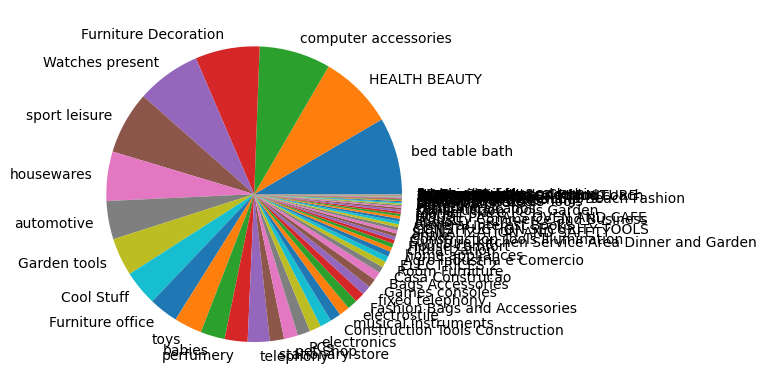

In [268]:
plt.pie(df["sales percentage"],labels=df["product_category"])
plt.show()

# Identify the correlation between product price and the number of times a product has been purchased.

In [274]:
query = """ select products.product_category,count(order_items.product_id) count_of_ordered_items,
round(avg(order_items.price),2) avg_price
from products join order_items
on products.product_id = order_items.product_id
group by product_category;
"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["product_category","count_of_ordered_items","avg_price"])
df

import numpy as np
arr1=df["count_of_ordered_items"]
arr2=df["avg_price"]

np.corrcoef([arr1,arr2])


array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

# Calculate the total revenue generated by each seller, and rank them by revenue.

In [279]:
query = """ select *,dense_rank() over (order by revenue desc) as ranks from
(select order_items.seller_id,sum(payments.payment_value ) revenue
from order_items join payments
on order_items.order_id = payments.order_id
group by seller_id) as a;
"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["seller id","revenue","rank"])
df

,seller id,revenue,rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.907302,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.039840,2
2,4a3ca9315b744ce9f8e9374361493884,301245.269765,3
3,1f50f920176fa81dab994f9023523100,290253.420128,4
4,53243585a1d6dc2643021fd1853d8905,284903.080498,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.209999,3082
3091,702835e4b785b67a084280efca355756,18.559999,3083
3092,4965a7002cca77301c82d3f91b82e1a9,16.360001,3084
3093,77128dec4bec4878c37ab7d6169d6f26,15.220000,3085


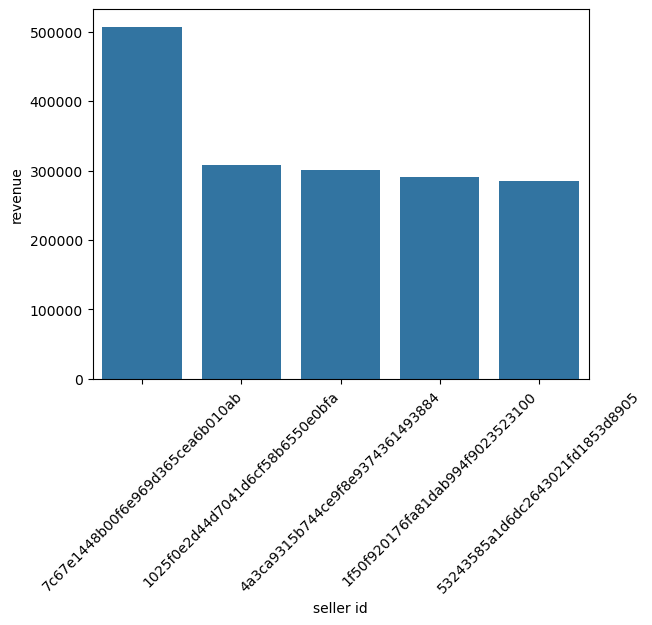

In [287]:
df1=df.head(5)
sns.barplot(x="seller id",y="revenue",data=df1)
plt.xticks(rotation=45)
plt.show()

#  Calculate the moving average of order values for each customer over their order history

In [294]:
query="""select a.*,avg(payment_value) over (partition  by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row )  as moving_avg from
(select orders.customer_id,orders.order_purchase_timestamp,payments.payment_value
from orders join payments	
on orders.order_id = payments.order_id) as a;
"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["customer id","order purchase timestamp","payment value","moving average"])
df

,customer id,order purchase timestamp,payment value,moving average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


In [318]:
#or
query="""select orders.customer_id,orders.order_purchase_timestamp,payments.payment_value,avg(payment_value)
over (partition  by customer_id order by order_purchase_timestamp asc
rows between 2 preceding and current row) as moving_average
from orders join payments	
on orders.order_id = payments.order_id
order by customer_id desc
"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["customer id","order purchase timestamp","payment value","moving average"])
df.head(20)

,customer id,order purchase timestamp,payment value,moving average
0,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
1,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
2,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
3,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
4,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
5,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,9.49,5.065000
6,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,0.64,0.640000
7,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 00:55:27,91.91,91.910004
8,fffc22669ca576ae3f654ea64c8f36be,2017-06-30 11:21:11,101.56,101.559998
9,fffb97495f78be80e2759335275df2aa,2018-01-16 14:51:35,61.01,61.009998


# Calculate the cumulative sales per month for each year.

In [326]:
query="""select *,sum(payments) over (order by years,months) as cumulative_sales from
(select month(orders.order_purchase_timestamp) months,year(orders.order_purchase_timestamp) years, sum(payments.payment_value) payments
from orders join payments
on orders.order_id = payments.order_id
group by months,years
order by years,months) as a ;
"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["monts","year","payment","cumulative_sales"])
df.head(20)

,monts,year,payment,cumulative_sales
0,9,2016,2.522400e+02,2.522400e+02
1,10,2016,5.909048e+04,5.934272e+04
2,12,2016,1.962000e+01,5.936234e+04
3,1,2017,1.384880e+05,1.978504e+05
4,2,2017,2.919080e+05,4.897584e+05
5,3,2017,4.498636e+05,9.396220e+05
6,4,2017,4.177880e+05,1.357410e+06
7,5,2017,5.929188e+05,1.950329e+06
8,6,2017,5.112764e+05,2.461605e+06
9,7,2017,5.923829e+05,3.053988e+06


# Calculate the year-over-year growth rate of total sales

In [331]:
query="""select *,lag(payments) over() previos_payment , ((payments-lag(payments) over())/lag(payments) over())*100 as year_over_year_growt_percentage from
(select year(orders.order_purchase_timestamp) years, sum(payments.payment_value) payments
from orders join payments
on orders.order_id = payments.order_id
group by years
order by years) as a;
"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["year","payment","previous_payment","yoy growth%"])
df

,year,payment,previous_payment,yoy growth%
0,2016,5.936234e+04,NaN,NaN
1,2017,7.249747e+06,5.936234e+04,12112.703760
2,2018,8.699763e+06,7.249747e+06,20.000924


In [335]:
query="""with a as
(select year(orders.order_purchase_timestamp) years, sum(payments.payment_value) payments
from orders join payments
on orders.order_id = payments.order_id
group by years
order by years)

select *,lag(payments) over() previos_payment , ((payments-lag(payments) over())/lag(payments) over())*100 
as year_over_year_growt_percentage from a;
"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["year","payment","previous_payment","yoy growth%"])
df

,year,payment,previous_payment,yoy growth%
0,2016,5.936234e+04,NaN,NaN
1,2017,7.249747e+06,5.936234e+04,12112.703760
2,2018,8.699763e+06,7.249747e+06,20.000924


#  Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

#  Identify the top 3 customers who spent the most money in each year.


In [343]:
query="""select * from
(select *,dense_rank() over ( partition by years order by spent desc) d_rank
from
(select orders.customer_id,year(orders.order_purchase_timestamp) as years,sum(payments.payment_value) spent
from orders join payments
on orders. order_id = payments.order_id
group by customer_id,years) as a) as b
where d_rank <=3;
"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["customer id","year","spent","dense rank"])
df

,customer id,year,spent,dense rank
0,a9dc96b027d1252bbac0a9b72d837fc6,2016,1423.550049,1
1,1d34ed25963d5aae4cf3d7f3a4cda173,2016,1400.739990,2
2,4a06381959b6670756de02e07b83815f,2016,1227.780029,3
3,1617b1357756262bfa56ab541c47bc16,2017,13664.080078,1
4,c6e2731c5b391845f6800c97401a43a9,2017,6929.310059,2
5,3fd6777bbce08a352fddd04e4a7cc8f6,2017,6726.660156,3
6,ec5b2ba62e574342386871631fafd3fc,2018,7274.879883,1
7,f48d464a0baaea338cb25f816991ab1f,2018,6922.209961,2
8,e0a2412720e9ea4f26c1ac985f6a7358,2018,4809.439941,3


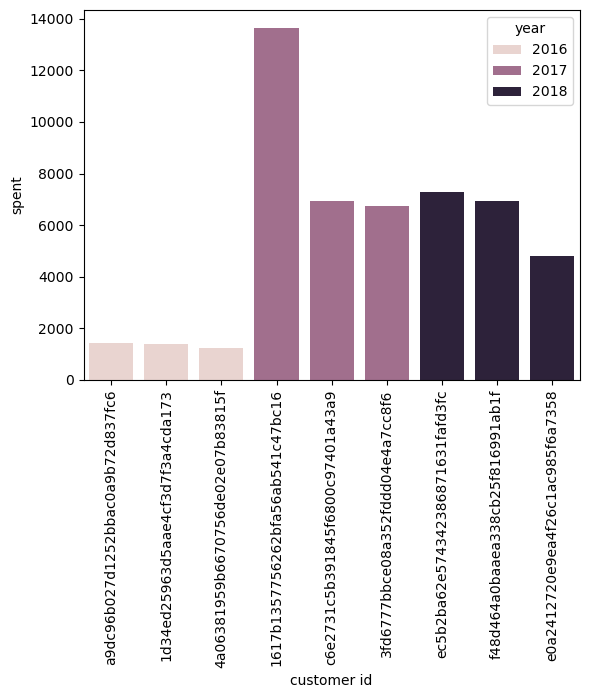

In [357]:
sns.barplot(x="customer id",y="spent",data=df,hue="year")
plt.xticks(rotation=45*2)
plt.show()